Fake.csv columns: ['title', 'text', 'subject', 'date']
True.csv columns: ['title', 'text', 'subject', 'date']

Fake sample:


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"



True sample:


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"



Combined dataset shape: (44898, 5)
Label value counts (0 = FAKE, 1 = REAL):
label
0    23481
1    21417
Name: count, dtype: int64

Cleaned text example (first row):
donald trump sends out embarrassing new year s eve message this is disturbing donald trump just couldn t wish all americans a happy new year and leave it at that instead he had to give a shout out to his enemies haters and the very dishonest fake news media the former reality show star had just one  ...

=== Cleaned Text Samples (Table) ===


,clean_content,label
0,donald trump sends out embarrassing new year s...,0
1,drunk bragging trump staffer started russian c...,0
2,sheriff david clarke becomes an internet joke ...,0
3,trump is so obsessed he even has obama s name ...,0
4,pope francis just called out donald trump duri...,0


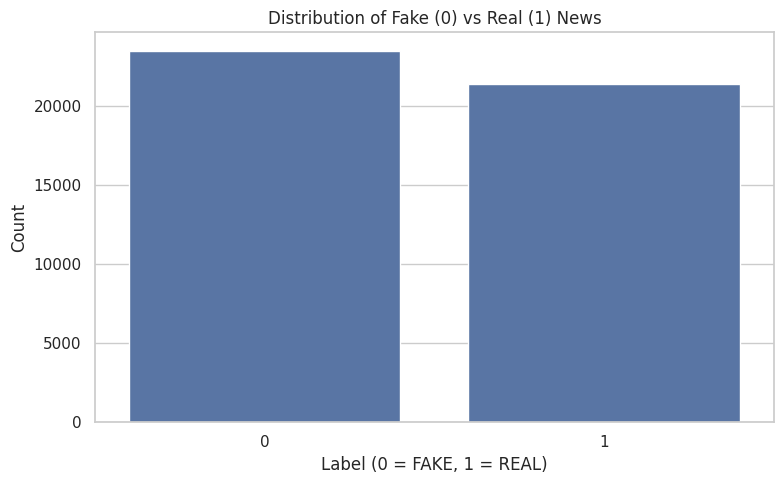


Train size: 35918
Test size : 8980

Vectorized shape (train): (35918, 12000)

Model training complete.

============== MODEL PERFORMANCE METRICS ==============
Accuracy : 0.9963
Precision: 0.9972
Recall   : 0.9951

Detailed classification report:

              precision    recall  f1-score   support

           0     0.9955    0.9974    0.9965      4696
           1     0.9972    0.9951    0.9961      4284

    accuracy                         0.9963      8980
   macro avg     0.9964    0.9963    0.9963      8980
weighted avg     0.9963    0.9963    0.9963      8980

Confusion Matrix (raw values):
 [[4684   12]
 [  21 4263]]


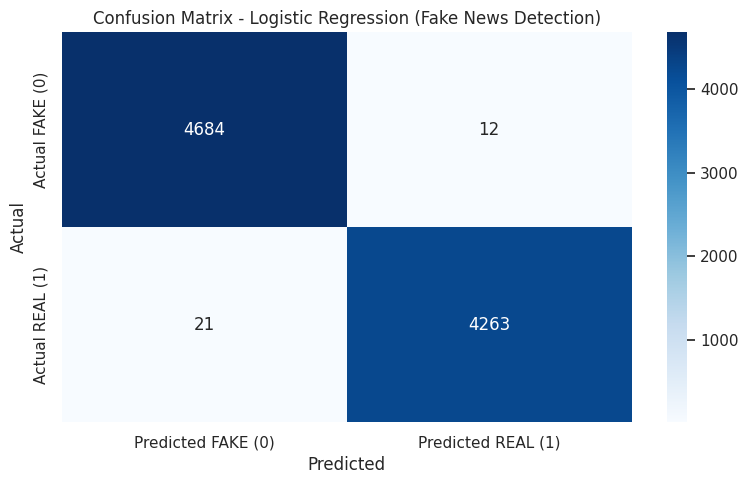


================ SAMPLE PREDICTIONS =================

Sample 1: India has agreed to hold talks on Afghanistan with the United States and Kabul, 
            Indian Foreign Minister Sushma Swaraj said on Wednesday after meeting U.S. Secretary of State Rex Tillerson in New Delhi. 
            Swaraj said she also discussed deepening economic ties with the United States. 
Predicted: REAL
Probabilities [P(fake), P(real)]: [0.30675498 0.69324502]

Sample 2: Breaking!!! You won 10 crore lottery, click this suspicious link now!
Predicted: FAKE
Probabilities [P(fake), P(real)]: [0.98685888 0.01314112]

Sample 3: A powerful explosion occurred in the city center and police are investigating.
Predicted: FAKE
Probabilities [P(fake), P(real)]: [0.9258788 0.0741212]


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('clean_content').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'label'}, axis=1)
              .sort_values('label', ascending=True))
  xs = counted['label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('label', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('clean_content')):
  _plot_series(series, series_name, i)
  fig.legend(title='clean_content', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('count()')

In [ ]:
# FAKE NEWS DETECTION - LOGISTIC REGRESSION

import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    max_features=15000,
    stop_words='english',
    ngram_range=(1,2)
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report
)

from IPython.display import display

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


fake_path = "Fake.csv"
true_path = "True.csv"

df_fake = pd.read_csv('/content/drive/MyDrive/Fake_news_detector/Fake.csv')
df_true= pd.read_csv('/content/drive/MyDrive/Fake_news_detector/True.csv')

print("Fake.csv columns:", df_fake.columns.tolist())
print("True.csv columns:", df_true.columns.tolist())

print("\nFake sample:")
display(df_fake.head(2))
print("\nTrue sample:")
display(df_true.head(2))


# -----------------------------------------------------
# 0 = FAKE, 1 = REAL
df_fake['label'] = 0
df_true['label'] = 1

df = pd.concat([df_fake, df_true], ignore_index=True)

print("\nCombined dataset shape:", df.shape)
print("Label value counts (0 = FAKE, 1 = REAL):")
print(df['label'].value_counts())


TITLE_COL = 'title'
TEXT_COL  = 'text'
LABEL_COL = 'label'

# Drop rows where text or title is missing
df = df.dropna(subset=[TITLE_COL, TEXT_COL])

df['content'] = df[TITLE_COL].astype(str) + " " + df[TEXT_COL].astype(str)

# Simple text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_content'] = df['content'].apply(clean_text)

print("\nCleaned text example (first row):")
print(df['clean_content'].iloc[0][:300], "...")


# Show cleaned data in tabular form (for report)
print("\n=== Cleaned Text Samples (Table) ===")
display(df[['clean_content', LABEL_COL]].head(5))


# 5) LABEL DISTRIBUTION PLOT
# -----------------------------------------------------
plt.figure()
sns.countplot(x=LABEL_COL, data=df)
plt.title("Distribution of Fake (0) vs Real (1) News")
plt.xlabel("Label (0 = FAKE, 1 = REAL)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# 6) TRAIN-TEST SPLIT
# -----------------------------------------------------
X = df['clean_content']
y = df[LABEL_COL].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nTrain size:", X_train.shape[0])
print("Test size :", X_test.shape[0])


# 7) FEATURE EXTRACTION - BAG OF WORDS WITH N-GRAMS
# -----------------------------------------------------
vectorizer = CountVectorizer(
    max_features=12000,
    stop_words='english',
    ngram_range=(1, 2)
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)

print("\nVectorized shape (train):", X_train_vec.shape)


# 8) LOGISTIC REGRESSION MODEL
# -----------------------------------------------------
model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    solver='liblinear'
)

model.fit(X_train_vec, y_train)
print("\nModel training complete.")


# 9) MODEL EVALUATION - METRICS + CONFUSION MATRIX
# -----------------------------------------------------
y_pred = model.predict(X_test_vec)

# Core metrics
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred, zero_division=0)

print("\n============== MODEL PERFORMANCE METRICS ==============")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")

print("\nDetailed classification report:\n")
print(classification_report(y_test, y_pred, digits=4))

# Confusion Matrix (numbers)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (raw values):\n", cm)

# Confusion Matrix Heatmap (for report)
plt.figure()
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=['Predicted FAKE (0)', 'Predicted REAL (1)'],
    yticklabels=['Actual FAKE (0)', 'Actual REAL (1)']
)
plt.title("Confusion Matrix - Logistic Regression (Fake News Detection)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()


# 10) PREDICTION FUNCTION FOR DEMO / PRESENTATION
# -----------------------------------------------------
def predict_news(text):
    cleaned = clean_text(text)
    vec = vectorizer.transform([cleaned])
    pred_numeric = model.predict(vec)[0]
    proba = model.predict_proba(vec)[0]

    label_map = {0: "FAKE", 1: "REAL"}

    return label_map[pred_numeric], proba


# Example demo texts
sample1 = '''India has agreed to hold talks on Afghanistan with the United States and Kabul,
            Indian Foreign Minister Sushma Swaraj said on Wednesday after meeting U.S. Secretary of State Rex Tillerson in New Delhi.
            Swaraj said she also discussed deepening economic ties with the United States. '''
sample2 = "Breaking!!! You won 10 crore lottery, click this suspicious link now!"
sample3 = "A powerful explosion occurred in the city center and police are investigating."

print("\n================ SAMPLE PREDICTIONS =================")
for i, s in enumerate([sample1, sample2, sample3], start=1):
    label, proba = predict_news(s)
    print(f"\nSample {i}: {s}")
    print("Predicted:", label)
    print("Probabilities [P(fake), P(real)]:", proba)
